In [53]:
## Importing various libraries

import time
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## sklearn Imports

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Keras Imports

from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.utils.np_utils import to_categorical
from keras.initializers import RandomNormal  #or xaiver/Hae normilization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.callbacks import LearningRateScheduler

In [54]:
# For plotting models

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [55]:
## For plotting confusion maps

def plot_confusion(confusion):

    for i in range(10):
        confusion[i][i] = 0
    
    plt.figure(figsize=(15,10))
    sns.heatmap(confusion,annot=True, linewidth = 1 , cmap="hot")

In [56]:
## Loading MNIST dataset

dataset = mnist
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

In [57]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


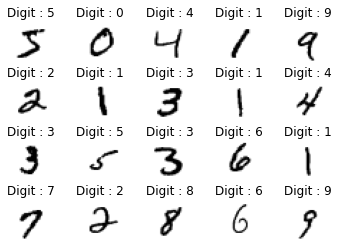

In [58]:
## Peeking at data

for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(X_train[i],cmap='gray_r')
  plt.title("Digit : {}".format(Y_train[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [59]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [60]:
# Normalizing the dataset by dividing values by 255 to convert the usual 0 to 256 pixel value to 0 to 1

X_train = X_train/255
X_test = X_test/255

# One-Hot incoding.
# This way numbers will be converted to an array of 0's with one 1 at the index of whatever number it originally was
# E.G.: 3 => [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [61]:
# Sizes

input_dim = X_train.shape[1]
output_dim = 10
batch_size = 128
epochs_num = 100
models_num = 9
Y_true = np.argmax(Y_test,axis = 1)
used_metrics = ["accuracy", tf.metrics.Recall(), tf.metrics.Precision()]

## Models tested

## BatchNormalization

In [62]:
model_A = Sequential()

model_A.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_A.add(BatchNormalization())
model_A.add(Dense(512, activation='sigmoid'))
model_A.add(BatchNormalization())
model_A.add(Dense(10, activation='softmax'))
model_A.compile(optimizer="adam", loss="categorical_crossentropy", metrics=used_metrics)

In [63]:
model_B = Sequential()

model_B.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_B.add(BatchNormalization())
model_B.add(Dense(512, activation='sigmoid'))
model_B.add(BatchNormalization())
model_B.add(Dense(10, activation='softmax'))
model_B.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=used_metrics)

In [64]:
model_C = Sequential()

model_C.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_C.add(BatchNormalization())
model_C.add(Dense(512, activation='relu'))
model_C.add(BatchNormalization())
model_C.add(Dense(10, activation='softmax'))
model_C.compile(optimizer="adam", loss="categorical_crossentropy", metrics=used_metrics)

In [65]:
model_D = Sequential()   

model_D.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_D.add(BatchNormalization())
model_D.add(Dense(512, activation='relu'))
model_D.add(BatchNormalization())
model_D.add(Dense(10, activation='softmax'))
model_D.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=used_metrics)

## Batch + Dropout

In [66]:
model_K = Sequential()

model_K.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_K.add(BatchNormalization())
model_K.add(Dropout(0.5))
model_K.add(Dense(512, activation='relu'))
model_K.add(BatchNormalization())
model_K.add(Dropout(0.5))
model_K.add(Dense(10, activation='softmax'))
model_K.compile(optimizer="adam", loss="categorical_crossentropy", metrics=used_metrics)

## None

In [67]:
model_M = Sequential()

model_M.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_M.add(Dense(512, activation='sigmoid'))
model_M.add(Dense(10, activation='softmax'))
model_M.compile(optimizer="adam", loss="categorical_crossentropy", metrics=used_metrics)

In [68]:
model_O = Sequential()

model_O.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_O.add(Dense(512, activation='relu'))
model_O.add(Dense(10, activation='softmax'))
model_O.compile(optimizer="adam", loss="categorical_crossentropy", metrics=used_metrics)

In [69]:
model_P = Sequential()   

model_P.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_P.add(Dense(512, activation='relu'))
model_P.add(Dense(10, activation='softmax'))
model_P.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=used_metrics)

In [70]:
model_Q = Sequential()

model_Q.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_Q.add(Dense(512, activation='sigmoid'))
model_Q.add(Dense(10, activation='softmax'))
model_Q.compile(optimizer="adam", loss="categorical_crossentropy", metrics=used_metrics)

In [71]:
## Making true results from Y_test back to a string

true_results = np.zeros(X_test.shape[0])

for i in range(10000):
    index_of_y_test = np.where(Y_test[i] == 1)
    true_results[i] = int(index_of_y_test[0])

In [72]:
# Function to decrease learning rate by 0.95 each epoch
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

# For saving results and fitting history
history = [0] * models_num
results = [0] * models_num

## Training MLP's individually & Display Accuracies + Confusion map

Test score: 0.1788213551044464
Test accuracy: 0.9771000146865845
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



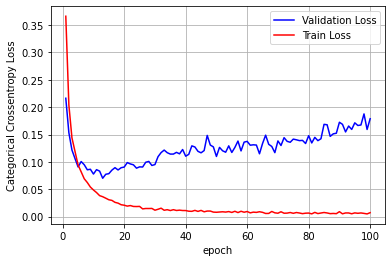

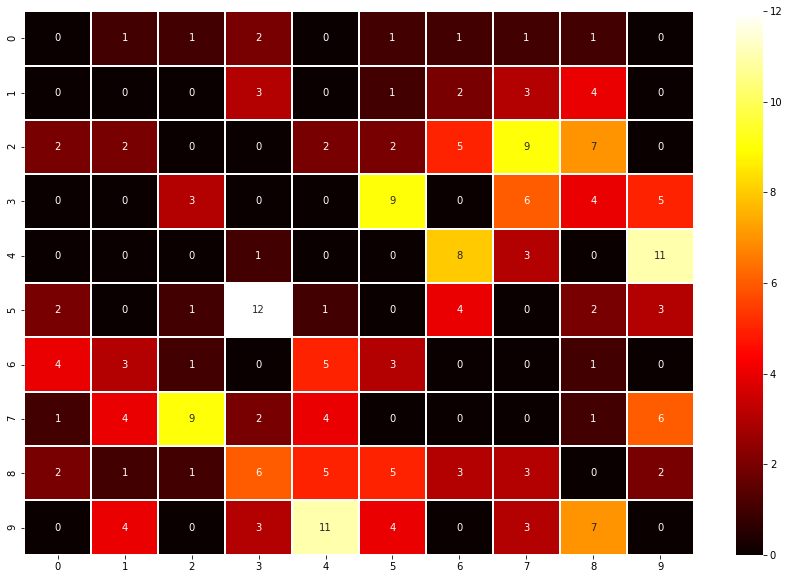

In [73]:
start_time = time.time()

history[0] = model_A.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[0] = model_A.predict(X_test)
results2 = np.argmax(results[0],axis = 1)
score = model_A.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[0].history['val_loss']
ty = history[0].history['loss']
plt_dynamic(x, vy, ty, ax)

dale = model_A.predict_classes(X_test)
print(classification_report(Y_true, dale))

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.08983134478330612
Test accuracy: 0.9781000018119812
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



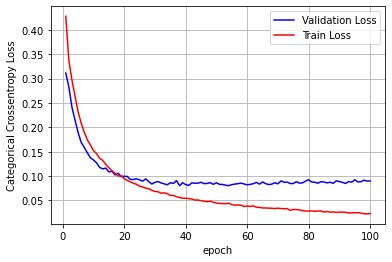

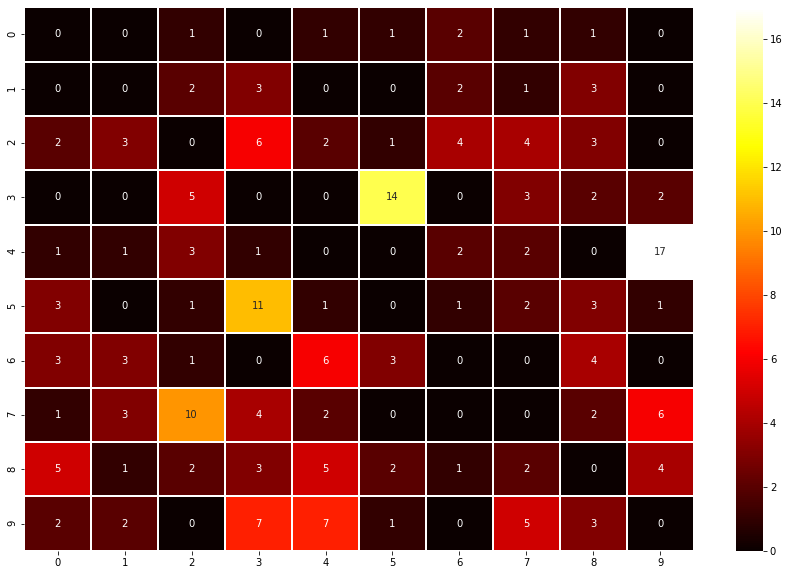

In [74]:
history[1] = model_B.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[1] = model_B.predict(X_test)
results2 = np.argmax(results[1],axis = 1)
score = model_B.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[1].history['val_loss']
ty = history[1].history['loss']
plt_dynamic(x, vy, ty, ax)

dale = model_B.predict_classes(X_test)
print(classification_report(Y_true, dale))

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.13627304136753082
Test accuracy: 0.979200005531311
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



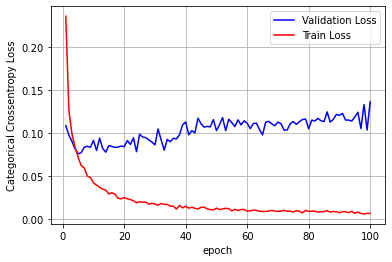

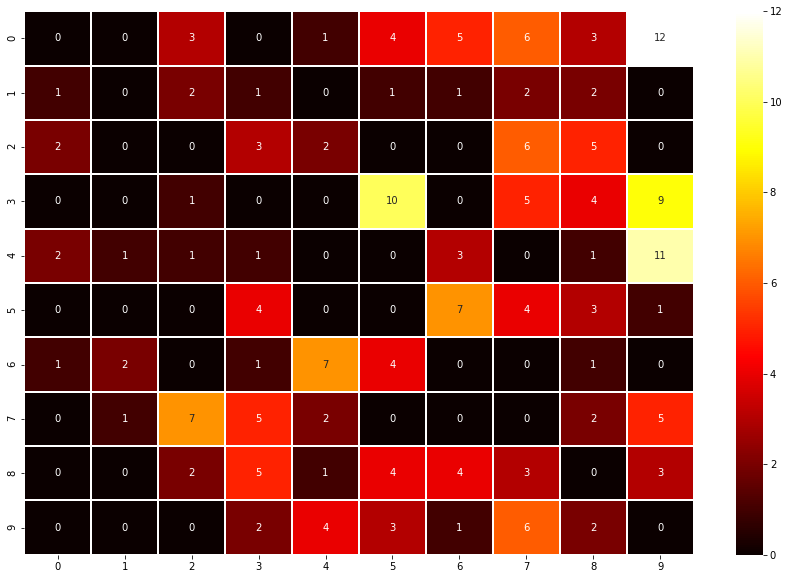

In [75]:
history[2] = model_C.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[2] = model_C.predict(X_test)
results2 = np.argmax(results[2],axis = 1)
score = model_C.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[2].history['val_loss']
ty = history[2].history['loss']
plt_dynamic(x, vy, ty, ax)

dale = model_C.predict_classes(X_test)
print(classification_report(Y_true, dale))

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.07159694284200668
Test accuracy: 0.982200026512146
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



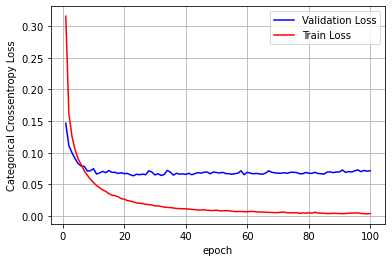

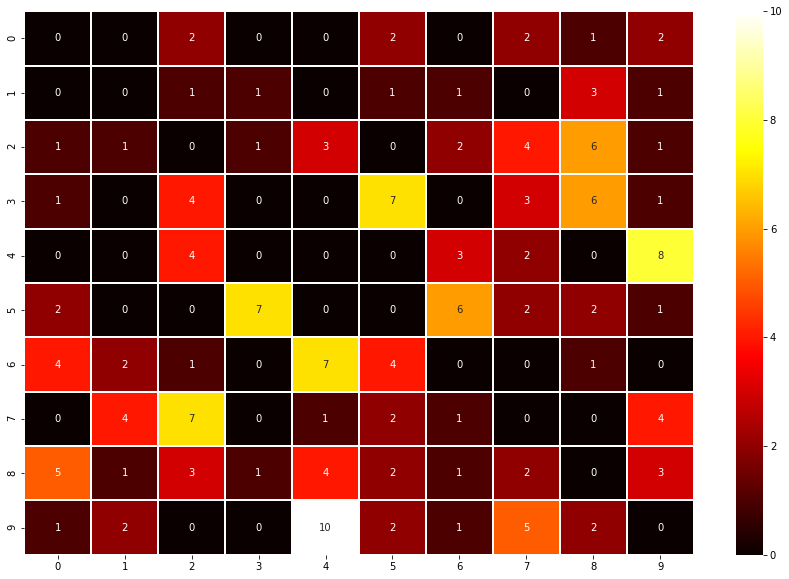

In [76]:
history[3] = model_D.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[3] = model_D.predict(X_test)
results2 = np.argmax(results[3],axis = 1)
score = model_D.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[3].history['val_loss']
ty = history[3].history['loss']
plt_dynamic(x, vy, ty, ax)

dale = model_D.predict_classes(X_test)
print(classification_report(Y_true, dale))

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.08293453603982925
Test accuracy: 0.9753000140190125
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



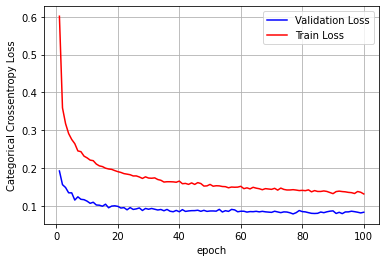

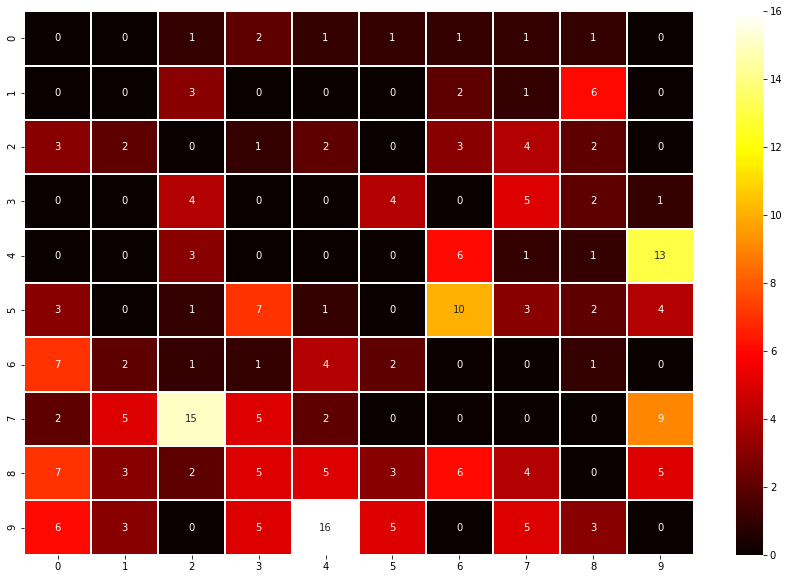

In [77]:
start_time = time.time()

history[4] = model_K.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[4] = model_K.predict(X_test)
results2 = np.argmax(results[4],axis = 1)
score = model_K.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[4].history['val_loss']
ty = history[4].history['loss']
plt_dynamic(x, vy, ty, ax)

dale = model_K.predict_classes(X_test)
print(classification_report(Y_true, dale))

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.22942517697811127
Test accuracy: 0.9747999906539917
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



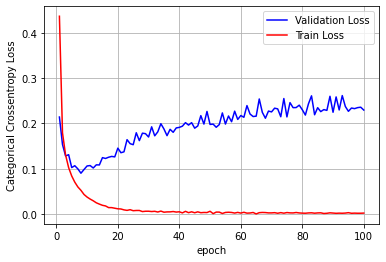

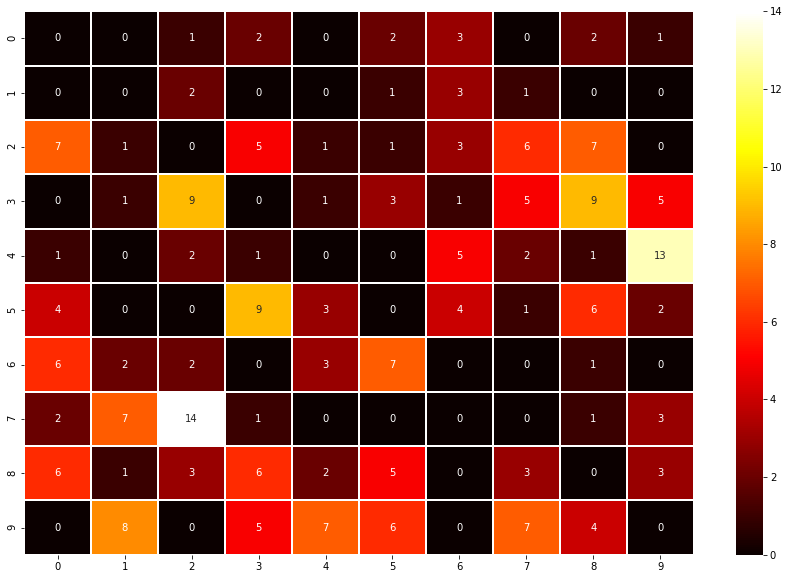

In [78]:
start_time = time.time()

history[5] = model_M.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[5] = model_M.predict(X_test)
results2 = np.argmax(results[5],axis = 1)
score = model_M.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[5].history['val_loss']
ty = history[5].history['loss']
plt_dynamic(x, vy, ty, ax)

dale = model_M.predict_classes(X_test)
print(classification_report(Y_true, dale))

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.4037874937057495
Test accuracy: 0.9781000018119812
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.95      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



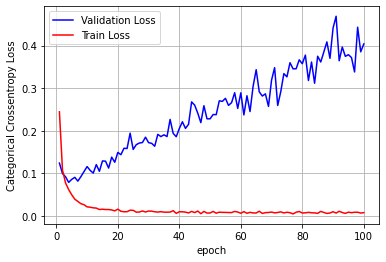

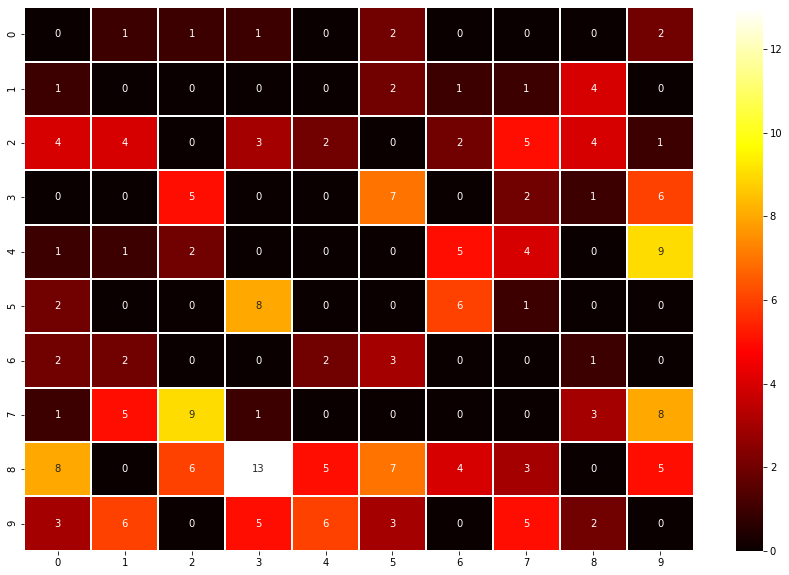

In [79]:
start_time = time.time()

history[6] = model_O.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[6] = model_O.predict(X_test)
results2 = np.argmax(results[6],axis = 1)
score = model_O.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[6].history['val_loss']
ty = history[6].history['loss']
plt_dynamic(x, vy, ty, ax)

dale = model_O.predict_classes(X_test)
print(classification_report(Y_true, dale))

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.0864778459072113
Test accuracy: 0.9790999889373779
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



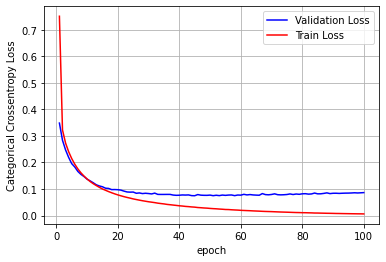

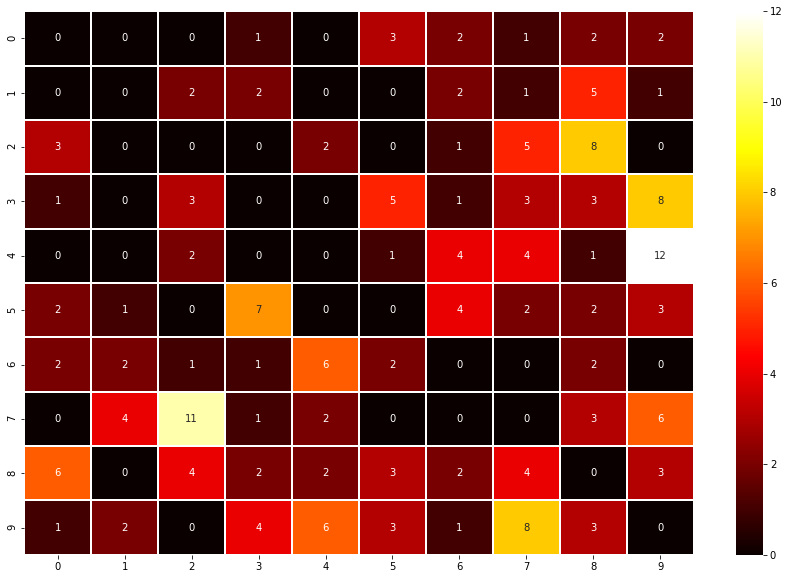

In [80]:
start_time = time.time()

history[7] = model_P.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[7] = model_P.predict(X_test)
results2 = np.argmax(results[7],axis = 1)
score = model_P.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[7].history['val_loss']
ty = history[7].history['loss']
plt_dynamic(x, vy, ty, ax)

dale = model_P.predict_classes(X_test)
print(classification_report(Y_true, dale))

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.18103374540805817
Test accuracy: 0.9793000221252441
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



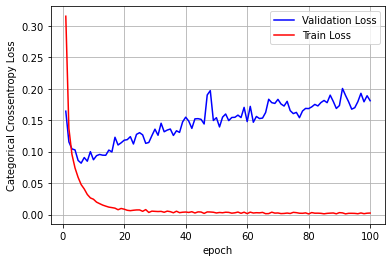

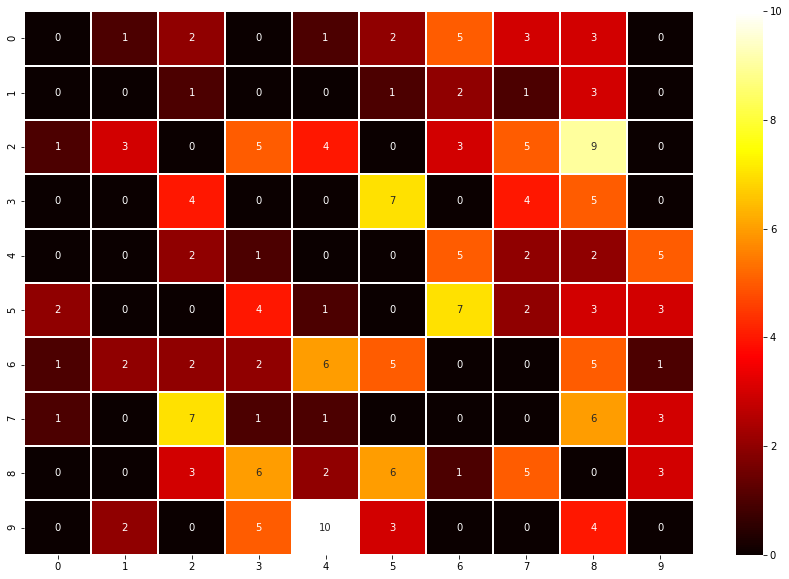

In [81]:
start_time = time.time()

history[8] = model_Q.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[8] = model_Q.predict(X_test)
results2 = np.argmax(results[8],axis = 1)
score = model_Q.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[8].history['val_loss']
ty = history[8].history['loss']
plt_dynamic(x, vy, ty, ax)

dale = model_Q.predict_classes(X_test)
print(classification_report(Y_true, dale))

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

## Ensemble of previous models

In [85]:
# Predict numbers from with ensemble

results2 = np.zeros( (X_test.shape[0],10) )
for j in range(models_num):
    results2 = results2 + results[j]
results2 = np.argmax(results2,axis = 1)
 
# Calculate Accuracy

c=0
for i in range(10000):
    index_of_y = np.where(Y_test[i] == 1)
    if results2[i]!=int(index_of_y[0]):
        c +=1
print("Ensemble Accuracy = %f" % (1-c/10000.))

Ensemble Accuracy = 0.987000


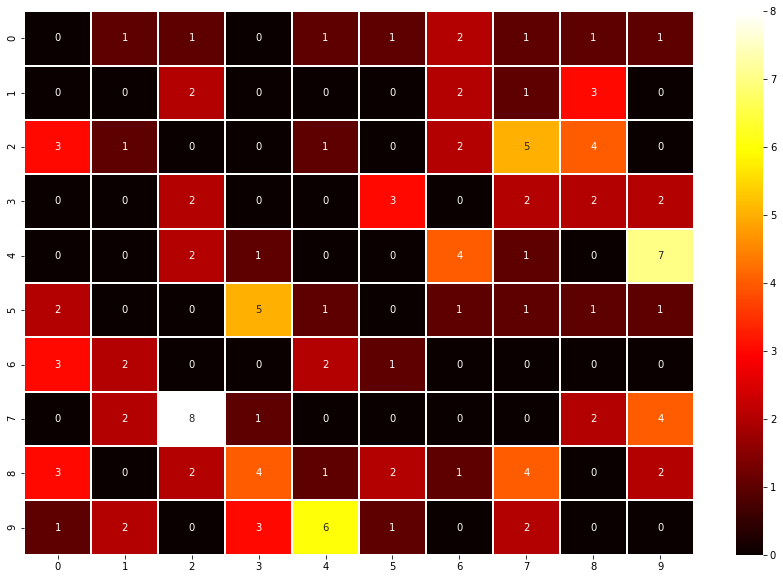

In [86]:
# Confusion map from ensemble

true_results = np.zeros(X_test.shape[0])

for i in range(10000):
    index_of_y_test = np.where(Y_test[i] == 1)
    true_results[i] = int(index_of_y_test[0])
    
    
confusion_ensemble = confusion_matrix(true_results, results2)

plot_confusion(confusion_ensemble)

In [87]:
results_train = [0] * models_num
results_train[0] = model_A.predict(X_train)
results_train[1] = model_B.predict(X_train)
results_train[2] = model_C.predict(X_train)
results_train[3] = model_D.predict(X_train)
results_train[4] = model_K.predict(X_train)
results_train[5] = model_M.predict(X_train)
results_train[6] = model_O.predict(X_train)
results_train[7] = model_P.predict(X_train)
results_train[8] = model_Q.predict(X_train)

In [88]:
newRes = []
index = 0
for result in results_train:
    newRes.append(np.argmax(result, axis = 1))
    index += 1

newSample = []
for i in range(len(newRes[0])):
    entry = []
    for j in range(len(newRes)):
        entry.append(newRes[j][i])
    newSample.append(np.asarray(entry))
    
    
newTest = []
index = 0
for result in results:
    newTest.append(np.argmax(result, axis = 1))
    index += 1

newTestSample = []
for i in range(len(newTest[0])):
    entry = []
    for j in range(len(newTest)):
        entry.append(newTest[j][i])
    newTestSample.append(np.asarray(entry))
    
model_Z = Sequential()

model_Z.add(Dense(64, activation='sigmoid', input_shape=(models_num,)))
model_Z.add(BatchNormalization())
model_Z.add(Dense(32, activation='sigmoid'))
model_Z.add(BatchNormalization())
model_Z.add(Dense(10, activation='softmax'))
model_Z.compile(optimizer="adam", loss="categorical_crossentropy", metrics=used_metrics)

In [89]:
z_history = model_Z.fit(np.asarray(newSample), Y_train, epochs=100, verbose=2, validation_data=(np.asarray(newTestSample), Y_test))

Epoch 1/100
1875/1875 - 9s - loss: 0.5512 - accuracy: 0.8261 - recall_3: 0.9827 - precision_2: 0.9870 - val_loss: 1.2641 - val_accuracy: 0.5992 - val_recall_3: 0.9825 - val_precision_2: 0.9869
Epoch 2/100
1875/1875 - 2s - loss: 0.2760 - accuracy: 0.9103 - recall_3: 0.9825 - precision_2: 0.9869 - val_loss: 1.7389 - val_accuracy: 0.5890 - val_recall_3: 0.9824 - val_precision_2: 0.9868
Epoch 3/100
1875/1875 - 2s - loss: 0.2011 - accuracy: 0.9300 - recall_3: 0.9823 - precision_2: 0.9867 - val_loss: 1.1390 - val_accuracy: 0.6035 - val_recall_3: 0.9823 - val_precision_2: 0.9867
Epoch 4/100
1875/1875 - 2s - loss: 0.1747 - accuracy: 0.9387 - recall_3: 0.9822 - precision_2: 0.9866 - val_loss: 0.4699 - val_accuracy: 0.9664 - val_recall_3: 0.9822 - val_precision_2: 0.9866
Epoch 5/100
1875/1875 - 2s - loss: 0.1329 - accuracy: 0.9574 - recall_3: 0.9822 - precision_2: 0.9866 - val_loss: 0.5414 - val_accuracy: 0.9641 - val_recall_3: 0.9822 - val_precision_2: 0.9866
Epoch 6/100
1875/1875 - 2s - loss: 

Epoch 44/100
1875/1875 - 2s - loss: 0.0074 - accuracy: 0.9981 - recall_3: 0.9818 - precision_2: 0.9861 - val_loss: 0.4019 - val_accuracy: 0.9712 - val_recall_3: 0.9818 - val_precision_2: 0.9861
Epoch 45/100
1875/1875 - 2s - loss: 0.0065 - accuracy: 0.9982 - recall_3: 0.9818 - precision_2: 0.9861 - val_loss: 0.6035 - val_accuracy: 0.9694 - val_recall_3: 0.9819 - val_precision_2: 0.9861
Epoch 46/100
1875/1875 - 2s - loss: 0.0070 - accuracy: 0.9981 - recall_3: 0.9818 - precision_2: 0.9861 - val_loss: 0.6750 - val_accuracy: 0.9690 - val_recall_3: 0.9819 - val_precision_2: 0.9861
Epoch 47/100
1875/1875 - 2s - loss: 0.0085 - accuracy: 0.9976 - recall_3: 0.9819 - precision_2: 0.9861 - val_loss: 0.5649 - val_accuracy: 0.8748 - val_recall_3: 0.9819 - val_precision_2: 0.9861
Epoch 48/100
1875/1875 - 2s - loss: 0.0068 - accuracy: 0.9982 - recall_3: 0.9819 - precision_2: 0.9861 - val_loss: 0.6104 - val_accuracy: 0.8736 - val_recall_3: 0.9819 - val_precision_2: 0.9861
Epoch 49/100
1875/1875 - 2s - 

Epoch 87/100
1875/1875 - 2s - loss: 0.0024 - accuracy: 0.9997 - recall_3: 0.9821 - precision_2: 0.9861 - val_loss: 6.8154 - val_accuracy: 0.6796 - val_recall_3: 0.9821 - val_precision_2: 0.9861
Epoch 88/100
1875/1875 - 2s - loss: 0.0033 - accuracy: 0.9991 - recall_3: 0.9821 - precision_2: 0.9861 - val_loss: 0.7743 - val_accuracy: 0.9695 - val_recall_3: 0.9821 - val_precision_2: 0.9861
Epoch 89/100
1875/1875 - 2s - loss: 0.0030 - accuracy: 0.9992 - recall_3: 0.9821 - precision_2: 0.9861 - val_loss: 0.8387 - val_accuracy: 0.9694 - val_recall_3: 0.9821 - val_precision_2: 0.9861
Epoch 90/100
1875/1875 - 2s - loss: 0.0051 - accuracy: 0.9981 - recall_3: 0.9821 - precision_2: 0.9861 - val_loss: 0.8696 - val_accuracy: 0.9703 - val_recall_3: 0.9821 - val_precision_2: 0.9861
Epoch 91/100
1875/1875 - 2s - loss: 0.0026 - accuracy: 0.9995 - recall_3: 0.9821 - precision_2: 0.9861 - val_loss: 0.8254 - val_accuracy: 0.9698 - val_recall_3: 0.9821 - val_precision_2: 0.9861
Epoch 92/100
1875/1875 - 2s - 

In [95]:
score = model_Z.evaluate(np.asarray(newTestSample), Y_test, verbose=0) 
print('Accuracy:',score[1])

Accuracy: 0.9708999991416931


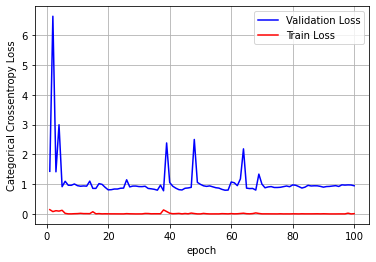

In [96]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,100+1))

vy = z_history.history['val_loss']
ty = z_history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [100]:
def allEqual(x):
    List = x.tolist()
    return List.count(List[0]) == len(List)

newSample = []
for i in range(len(newRes[0])):
    entry = []
    for j in range(len(newRes)):
        entry.append(newRes[j][i])
    newSample.append(np.asarray(entry))
    
new_trainY = Y_train.copy().tolist()

print(len(newSample))
print(len(new_trainY))

index = 0
while index < len(newSample):
    if(allEqual(newSample[index])):
        del newSample[index]
        del new_trainY[index]
    else:
        index += 1

print(len(newSample))
print(len(new_trainY))


60000
60000
883
883


In [101]:
z_history = model_Z.fit(np.asarray(newSample), np.asarray(new_trainY), epochs=100, verbose=2, validation_data=(np.asarray(newTestSample), Y_test))

Epoch 1/100
28/28 - 0s - loss: 0.0920 - accuracy: 0.9751 - recall_3: 0.9817 - precision_2: 0.9856 - val_loss: 0.9867 - val_accuracy: 0.9684 - val_recall_3: 0.9817 - val_precision_2: 0.9856
Epoch 2/100
28/28 - 0s - loss: 0.0068 - accuracy: 0.9966 - recall_3: 0.9817 - precision_2: 0.9856 - val_loss: 1.0084 - val_accuracy: 0.9703 - val_recall_3: 0.9817 - val_precision_2: 0.9856
Epoch 3/100
28/28 - 0s - loss: 0.0066 - accuracy: 0.9989 - recall_3: 0.9817 - precision_2: 0.9856 - val_loss: 1.0043 - val_accuracy: 0.9712 - val_recall_3: 0.9817 - val_precision_2: 0.9856
Epoch 4/100
28/28 - 0s - loss: 0.0013 - accuracy: 1.0000 - recall_3: 0.9817 - precision_2: 0.9856 - val_loss: 1.0044 - val_accuracy: 0.9707 - val_recall_3: 0.9817 - val_precision_2: 0.9856
Epoch 5/100
28/28 - 0s - loss: 6.6289e-04 - accuracy: 1.0000 - recall_3: 0.9817 - precision_2: 0.9856 - val_loss: 0.9932 - val_accuracy: 0.9709 - val_recall_3: 0.9817 - val_precision_2: 0.9856
Epoch 6/100
28/28 - 0s - loss: 0.0023 - accuracy: 0

Epoch 44/100
28/28 - 0s - loss: 0.0096 - accuracy: 0.9977 - recall_3: 0.9814 - precision_2: 0.9853 - val_loss: 0.9190 - val_accuracy: 0.9714 - val_recall_3: 0.9814 - val_precision_2: 0.9853
Epoch 45/100
28/28 - 0s - loss: 2.1323e-04 - accuracy: 1.0000 - recall_3: 0.9814 - precision_2: 0.9853 - val_loss: 0.9514 - val_accuracy: 0.9709 - val_recall_3: 0.9814 - val_precision_2: 0.9853
Epoch 46/100
28/28 - 0s - loss: 7.7574e-04 - accuracy: 1.0000 - recall_3: 0.9814 - precision_2: 0.9853 - val_loss: 0.9502 - val_accuracy: 0.9711 - val_recall_3: 0.9814 - val_precision_2: 0.9853
Epoch 47/100
28/28 - 0s - loss: 0.0037 - accuracy: 0.9989 - recall_3: 0.9814 - precision_2: 0.9853 - val_loss: 0.8484 - val_accuracy: 0.9709 - val_recall_3: 0.9814 - val_precision_2: 0.9853
Epoch 48/100
28/28 - 0s - loss: 0.0064 - accuracy: 0.9977 - recall_3: 0.9814 - precision_2: 0.9853 - val_loss: 0.8421 - val_accuracy: 0.9703 - val_recall_3: 0.9814 - val_precision_2: 0.9853
Epoch 49/100
28/28 - 0s - loss: 0.0016 - a

Epoch 87/100
28/28 - 0s - loss: 0.0060 - accuracy: 0.9989 - recall_3: 0.9813 - precision_2: 0.9852 - val_loss: 0.9188 - val_accuracy: 0.9709 - val_recall_3: 0.9813 - val_precision_2: 0.9852
Epoch 88/100
28/28 - 0s - loss: 8.5332e-04 - accuracy: 1.0000 - recall_3: 0.9813 - precision_2: 0.9852 - val_loss: 0.9460 - val_accuracy: 0.9704 - val_recall_3: 0.9813 - val_precision_2: 0.9852
Epoch 89/100
28/28 - 0s - loss: 0.0199 - accuracy: 0.9898 - recall_3: 0.9813 - precision_2: 0.9852 - val_loss: 0.9242 - val_accuracy: 0.9699 - val_recall_3: 0.9813 - val_precision_2: 0.9852
Epoch 90/100
28/28 - 0s - loss: 0.0071 - accuracy: 0.9989 - recall_3: 0.9813 - precision_2: 0.9852 - val_loss: 0.8074 - val_accuracy: 0.9713 - val_recall_3: 0.9813 - val_precision_2: 0.9852
Epoch 91/100
28/28 - 0s - loss: 7.1496e-04 - accuracy: 1.0000 - recall_3: 0.9813 - precision_2: 0.9852 - val_loss: 0.8014 - val_accuracy: 0.9703 - val_recall_3: 0.9813 - val_precision_2: 0.9852
Epoch 92/100
28/28 - 0s - loss: 0.0022 - a

In [102]:
score = model_Z.evaluate(np.asarray(newTestSample), Y_test, verbose=0) 
print('Accuracy:',score[1])

Accuracy: 0.9711999893188477
